___

<center> <h1> YOUTUBE VIEWS AND REVENUE PREDICTION

___

### BUSINESS CONTEXT

- Getting to know YouTube analytics is crucial if we want to make the most of our YouTube channel. By quantifying the successes and failures of our videos, we can zero in on opportunities to provide value to our subscribers and keep them engaged. <br><br>

- So, I have monitored the performance of my channel and videos with up-to-date metrics and reports in YouTube Analytics for more than two years.<br><br>

- The data has been taken from my own youtube channel i.e. Aditya Kumar. This is the channel link https://youtube.com/adityakumar

## BUSINESS PROBLEM

>I would like to understand what factors are driving views. I want to use these insights to to get more views and generate maximum revenue through my channel.

### DATA DICTIONARY

The dataset contains information of 62 videos uploaded over the past two years. The explanation of every variables:

- **date** : date of upload<br>
- **title** : lenth of the title<br>
- **desciption** : length of the description<br>
- **tags** : length of the tags<br>
- **duration** : duration of the video<br>
- **playlist** : number of playlists featuring that video<br>
- **copyright_claim** : whether there is a copyright strike on the video or not<br>
- **comments** : number of comments on the video<br>
- **watch_time** : watch time of the video in hours<br>
- **audience_retention** : average percentage of a YouTube video that people watch in hours<br>
- **likes_vs_dislikes** : likes vs dislikes<br>
- **week_no** : in which week the video was uploaded<br>
- **duration_sec** : duration of video in seconds<br>
- **views** : total number of views on the video<br>
- **revenue** : revenue on a video in dollars

___

#### IMPORTING REQUIRED LIBRARIES

In [23]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# warnings
import warnings
warnings.filterwarnings('ignore')

#### IMPORTING THE DATASET

In [24]:
dataset = pd.read_excel('youtube_analytics.xlsx')

___

## DATA AUDIT

In [25]:
# first five rows of the dataset
dataset.head()

,date,title,description,tags,duration,playlist,copyright_claim,comments,watch_time,audience_retention,likes_vs_dislikes,week_no,duration_sec,views,revenue
0,2020-01-05,77,488,443,14:08:00,2,1,103,788,0.300,0.993,2,848,11015,2.02
1,2019-12-25,62,569,434,03:27:00,1,0,64,141,0.496,0.972,52,207,4940,1.42
2,2019-12-22,53,161,234,02:36:00,1,0,220,245,0.630,0.997,52,156,8917,2.07
3,2019-06-29,58,1502,202,01:52:00,1,0,179,309,0.600,0.992,26,112,16436,2.69
4,2019-06-08,59,1502,245,02:07:00,1,0,177,562,0.605,0.992,23,127,26174,4.06


In [26]:
# last five rows of the dataset
dataset.tail() 

,date,title,description,tags,duration,playlist,copyright_claim,comments,watch_time,audience_retention,likes_vs_dislikes,week_no,duration_sec,views,revenue
57,2018-02-02,94,1812,434,03:02:00,1,1,127,825,0.542,0.982,5,182,29975,3.38
58,2018-01-30,86,1736,436,03:31:00,1,0,370,5900,0.484,0.981,5,211,208151,21.05
59,2018-01-27,84,1608,357,01:59:00,1,0,290,2400,0.600,0.988,4,119,117857,14.72
60,2018-01-24,92,1709,447,02:56:00,2,0,313,5500,0.544,0.986,4,176,205518,36.08
61,2018-01-07,85,1637,485,02:22:00,2,0,524,15500,0.579,0.982,2,142,672446,47.23


In [27]:
# shape of the dataset
dataset.shape  

(62, 15)

In [28]:
# columns present in the dataset
dataset.columns

Index(['date', 'title', 'description', 'tags', 'duration', 'playlist',
       'copyright_claim', 'comments', 'watch_time', 'audience_retention',
       'likes_vs_dislikes', 'week_no', 'duration_sec', 'views', 'revenue'],
      dtype='object')

In [29]:
# a concise summary of the dataset
dataset.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
date                  datetime64[ns]
title                 int64
description           int64
tags                  int64
duration              object
playlist              int64
copyright_claim       int64
comments              int64
watch_time            int64
audience_retention    float64
likes_vs_dislikes     float64
week_no               int64
duration_sec          int64
views                 int64
revenue               float64
dtypes: datetime64[ns](1), float64(3), int64(10), object(1)
memory usage: 7.4+ KB


> The dataset has total **62 observation and 15 variable**s.

In [30]:
# number of missing values present in the dataset
dataset.isna().sum()

date                  0
title                 0
description           0
tags                  0
duration              0
playlist              0
copyright_claim       0
comments              0
watch_time            0
audience_retention    0
likes_vs_dislikes     0
week_no               0
duration_sec          0
views                 0
revenue               0
dtype: int64

> There are **no missing values** in the dataset.

In [31]:
# getting continous variables to get better clarity of the dataset.
dataset_conti_vars = dataset.loc[:, (dataset.dtypes == 'float64') | (dataset.dtypes == 'int64')]

In [32]:
# first five rows of the continous variables of dataset
dataset_conti_vars.head()  

,title,description,tags,playlist,copyright_claim,comments,watch_time,audience_retention,likes_vs_dislikes,week_no,duration_sec,views,revenue
0,77,488,443,2,1,103,788,0.300,0.993,2,848,11015,2.02
1,62,569,434,1,0,64,141,0.496,0.972,52,207,4940,1.42
2,53,161,234,1,0,220,245,0.630,0.997,52,156,8917,2.07
3,58,1502,202,1,0,179,309,0.600,0.992,26,112,16436,2.69
4,59,1502,245,1,0,177,562,0.605,0.992,23,127,26174,4.06


In [33]:
# Creating a UDF to get the summary of the continous variables for data exploration and analysis
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), (x.isnull().sum()/x.isnull().count()*100), x.sum(), x.min(), 
                      x.mean(), x.median(), x.std(), x.var(), x.quantile(.01), x.quantile(.05), x.quantile(.10), 
                      x.quantile(.25), x.quantile(.50), x.quantile(.75), x.quantile(.90), x.quantile(.95), 
                      x.quantile(.99), x.max()], 
                      index = ['N', 'NMISS', '%MISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 
                               'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [34]:
dataset_conti_vars.to_csv('dataset_conti_vars.csv', index=False)
dataset_conti_vars.apply(continous_var_summary).T.round()  

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
title,62.0,0.0,0.0,5195.0,50.0,84.0,89.0,14.0,2.070000e+02,52.0,58.0,60.0,74.0,89.0,95.0,99.0,100.0,100.0,100.0
description,62.0,0.0,0.0,95976.0,161.0,1548.0,1562.0,286.0,8.173700e+04,360.0,1491.0,1502.0,1508.0,1562.0,1654.0,1788.0,1812.0,1918.0,1928.0
tags,62.0,0.0,0.0,25200.0,201.0,406.0,435.0,93.0,8.642000e+03,202.0,245.0,273.0,326.0,435.0,494.0,499.0,500.0,500.0,500.0
playlist,62.0,0.0,0.0,80.0,0.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0
copyright_claim,62.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
comments,62.0,0.0,0.0,16811.0,50.0,271.0,229.0,185.0,3.417300e+04,59.0,80.0,126.0,177.0,229.0,321.0,426.0,526.0,1020.0,1119.0
watch_time,62.0,0.0,0.0,172193.0,141.0,2777.0,1100.0,5590.0,3.124722e+07,172.0,300.0,478.0,727.0,1100.0,2650.0,5860.0,7950.0,25406.0,40900.0
audience_retention,62.0,0.0,0.0,35.0,0.0,1.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
likes_vs_dislikes,62.0,0.0,0.0,61.0,1.0,1.0,1.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
week_no,62.0,0.0,0.0,1416.0,1.0,23.0,21.0,16.0,2.720000e+02,2.0,2.0,4.0,7.0,21.0,37.0,47.0,50.0,52.0,52.0


>From the table above, I noted a few things:<br> 
- Certainly, there are **outliers present** in the  dataset. we can spot them through high variance, and high standard deviation and the difference between p99 and Max. 
- We can also spot some more features, that dataset does not contain any **missing values**.

> - Through business accumen I came out to this conclusion that we **don't need date** variable in the dataset because as we can see most of the videos were uploaded on weekly basis and we already have a **week number** column. 
- Similarly duration variable, the duration of most of the video is **2 minutes** so for predicting views I need duration in seconds to be more precise and we already have a **duration in seconds** variables.
- Hence, we will **drop date** and **duration** variable from the dataset.

___

<h2> DATA PREPARATION

#### DROPPING IRRELEVENT VARIABLES

In [35]:
# dropping date and duration variable
dataset = dataset.drop(columns=['date', 'duration'])

#### TREATING OUTLIERS

In [36]:
# Clipping Outliers with P2 and P98
dataset = dataset.apply(lambda x: x.clip(lower=x.dropna().quantile(.2), upper=x.quantile(.98)))

In [37]:
dataset.apply(continous_var_summary).T.round()  

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
title,62.0,0.0,0.0,5321.0,70.0,86.0,89.0,11.0,1.200000e+02,70.0,70.0,70.0,74.0,89.0,95.0,99.0,100.0,100.0,100.0
description,62.0,0.0,0.0,99224.0,1502.0,1600.0,1562.0,113.0,1.275100e+04,1502.0,1502.0,1502.0,1508.0,1562.0,1654.0,1788.0,1812.0,1894.0,1894.0
tags,62.0,0.0,0.0,25873.0,319.0,417.0,435.0,76.0,5.707000e+03,319.0,319.0,319.0,326.0,435.0,494.0,499.0,500.0,500.0,500.0
playlist,62.0,0.0,0.0,80.0,1.0,1.0,1.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
copyright_claim,62.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
comments,62.0,0.0,0.0,17008.0,147.0,274.0,229.0,157.0,2.474400e+04,147.0,147.0,147.0,177.0,229.0,321.0,426.0,526.0,891.0,891.0
watch_time,62.0,0.0,0.0,146229.0,564.0,2359.0,1100.0,2952.0,8.712570e+06,564.0,564.0,564.0,727.0,1100.0,2650.0,5860.0,7950.0,14202.0,14202.0
audience_retention,62.0,0.0,0.0,36.0,1.0,1.0,1.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
likes_vs_dislikes,62.0,0.0,0.0,61.0,1.0,1.0,1.0,0.0,0.000000e+00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
week_no,62.0,0.0,0.0,1449.0,6.0,23.0,21.0,16.0,2.520000e+02,6.0,6.0,6.0,7.0,21.0,37.0,47.0,50.0,52.0,52.0


#### CONVERTING FEATURES

In [38]:
# coverting all the features to int data type
for col in dataset:
    dataset[col] = dataset[col].astype(float)

___

### DATA DISTRIBUTION

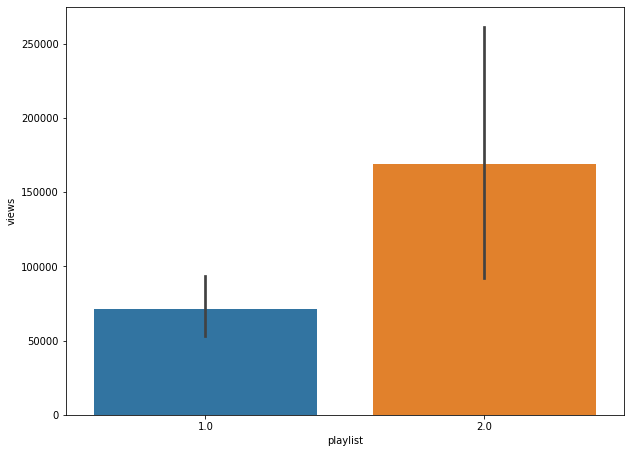

In [39]:
sns.barplot(x='playlist', y='views', data=dataset)

> Videos which are in more than one list are surely getting more views.

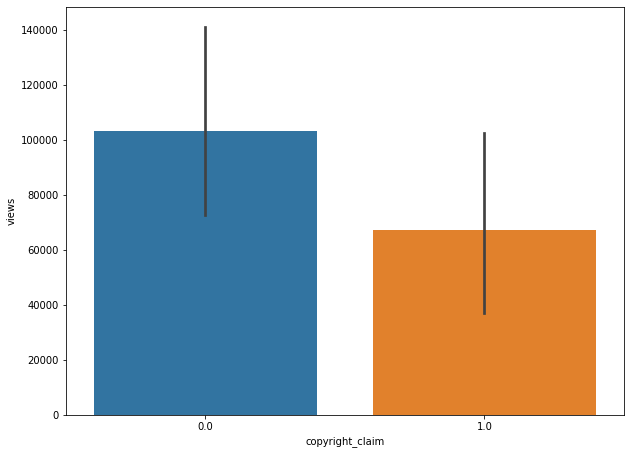

In [40]:
sns.barplot(x='copyright_claim', y='views', data=dataset)

> Videos which do not have any kind of restrictions or copyright claim get more number of views.

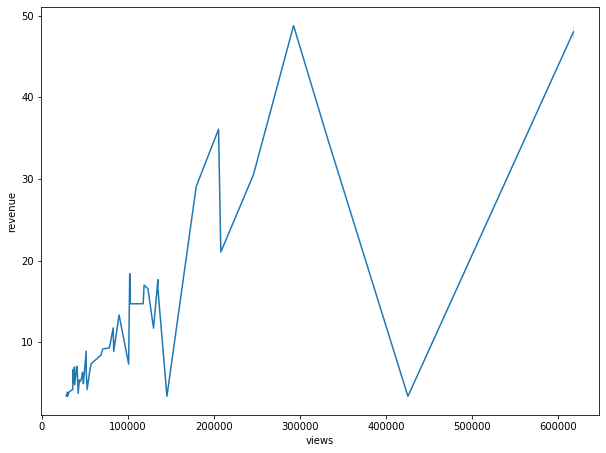

In [41]:
sns.lineplot(x='views', y='revenue', data=dataset)

> It is pretty clear from the above line chart that as number of views increases revenue increases. The dip are near the end might because of copyright claim on any video.

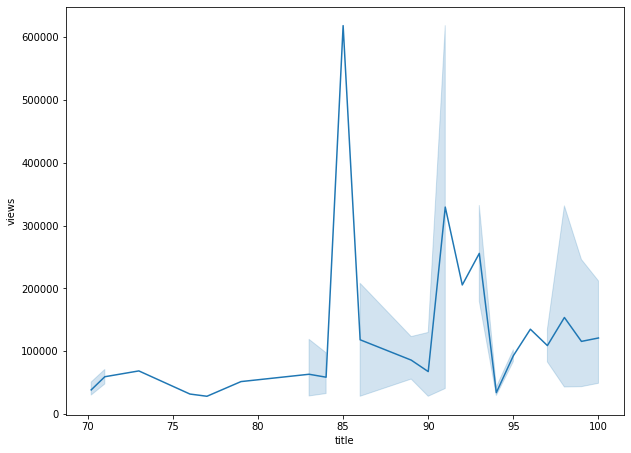

In [42]:
sns.lineplot(x='title', y='views', data=dataset)

> Videos having title length near to 85 tends to get more number of views.

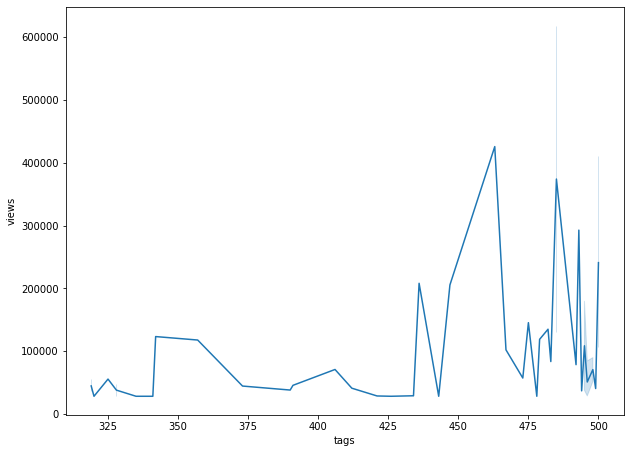

In [43]:
sns.lineplot(x='tags', y='views', data=dataset)

> Videos having length of tags near to 460 tends to get more number of views.

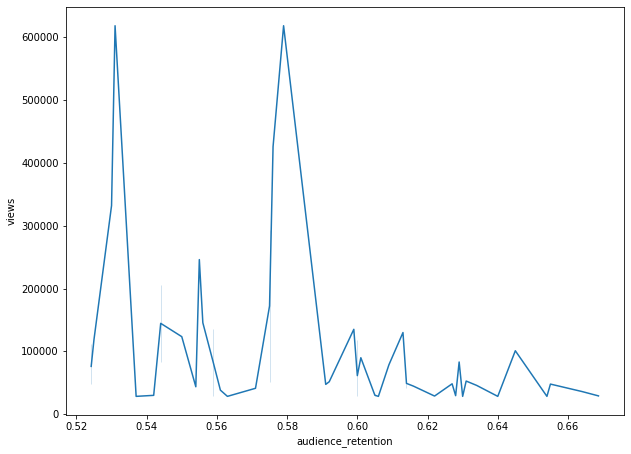

In [44]:
sns.lineplot(x='audience_retention', y='views', data=dataset)

> Videos which gets more views tends to have more impressions which means it will alse reach to those people who are not interested in it. Hence, they leave the video early which leads in low audience retention.

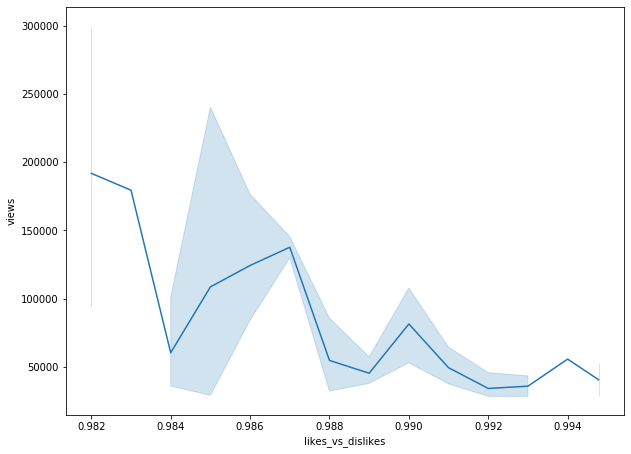

In [45]:
sns.lineplot(x='likes_vs_dislikes', y='views', data=dataset)

> From this line graph we can see that as video reaches to more people their opinion changes and tends to dislike the video bit more. Hence, we should precisely stick to the interest of our subscribers.

In [46]:
# computing pairwise correlation of columns
corrm = dataset.corr(method='pearson')

corrm.to_csv('corrm.csv', index=False)
corrm

,title,description,tags,playlist,copyright_claim,comments,watch_time,audience_retention,likes_vs_dislikes,week_no,duration_sec,views,revenue
title,1.000000,0.287248,0.478459,0.123495,0.146329,0.343040,0.334321,-0.256591,-0.263776,0.023818,0.324668,0.292553,0.341713
description,0.287248,1.000000,0.325080,0.148505,0.219581,0.353198,0.396933,-0.297100,-0.133610,-0.219522,0.342478,0.298413,0.415338
tags,0.478459,0.325080,1.000000,0.355400,0.233815,0.277874,0.437537,-0.380404,-0.412400,-0.317881,0.421467,0.379882,0.415765
playlist,0.123495,0.148505,0.355400,1.000000,0.151204,0.309887,0.451347,-0.257141,-0.125233,-0.139384,0.292013,0.360191,0.488829
copyright_claim,0.146329,0.219581,0.233815,0.151204,1.000000,-0.127393,-0.070333,-0.148077,-0.118642,-0.196762,0.161156,-0.086469,-0.069154
comments,0.343040,0.353198,0.277874,0.309887,-0.127393,1.000000,0.643615,-0.363077,-0.098910,-0.114840,0.351548,0.546685,0.608575
watch_time,0.334321,0.396933,0.437537,0.451347,-0.070333,0.643615,1.000000,-0.330584,-0.389072,-0.279523,0.300745,0.925562,0.918025
audience_retention,-0.256591,-0.297100,-0.380404,-0.257141,-0.148077,-0.363077,-0.330584,1.000000,0.259636,0.046251,-0.697194,-0.243927,-0.318611
likes_vs_dislikes,-0.263776,-0.133610,-0.412400,-0.125233,-0.118642,-0.098910,-0.389072,0.259636,1.000000,0.217500,-0.032067,-0.425580,-0.361261
week_no,0.023818,-0.219522,-0.317881,-0.139384,-0.196762,-0.114840,-0.279523,0.046251,0.217500,1.000000,-0.080242,-0.314185,-0.253167


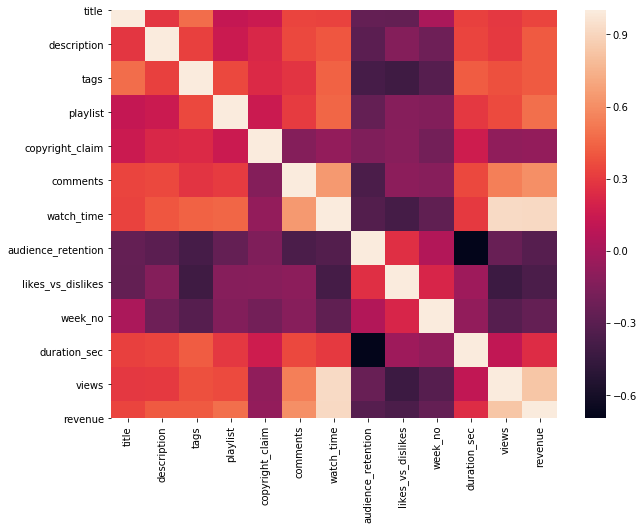

In [47]:
# graphical representation of correlation matrix using heatmap
sns.heatmap(corrm)

___

## BUILDING MACHINE LEARNING MODELS

- ### PREDICTICING VIEWS

In [48]:
X = dataset.drop(columns=['views', 'revenue'])
y = dataset.views

### STANDARIZING THE DATA

Standardization is performed to prevent features with wider ranges from dominating the distance metric.

In [49]:
# importing required library for standardization
from sklearn.preprocessing import StandardScaler

# standard scaling
sc = StandardScaler()
X = sc.fit_transform(X)

- <h3> MODELS

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)

Y_prediction = random_forest.predict(X)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.29 %


In [51]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linreg = LinearRegression()
linreg.fit(X, y)

Y_pred = linreg.predict(X)

acc_lin = round(linreg.score(X, y) * 100, 2)
print(round(acc_lin,2,), "%")

90.31 %


In [52]:
from sklearn.neighbors import KNeighborsRegressor

# KNN
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X, y)

Y_pred = knn.predict(X)

acc_knn = round(knn.score(X, y) * 100, 2)
print(round(acc_knn,2,), "%")

85.74 %


In [53]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X, y)

Y_pred = decision_tree.predict(X)

acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
print(round(acc_decision_tree,2,), "%")

100.0 %


### Which is the best model ?

In [54]:
results = pd.DataFrame({'Model': ['KNN', 'Linear Regression', 'Random Forest', 'Decision Tree'],
                        'Score': [acc_knn, acc_lin, acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Decision Tree
96.29,Random Forest
90.31,Linear Regression
85.74,KNN


As we can see, the Decision Tree goes on the first place. But there are high chances of overfitting in decision tree model. Hence, we will go with Random forest regressor.

### Random Forest

#### What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

### Feature Importance

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [55]:
importances = pd.DataFrame({'feature':dataset.drop(columns=['views', 'revenue']).columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [56]:
importances

,importance
feature,
watch_time,0.829
duration_sec,0.045
comments,0.032
likes_vs_dislikes,0.025
audience_retention,0.019
title,0.017
description,0.013
week_no,0.012
tags,0.006


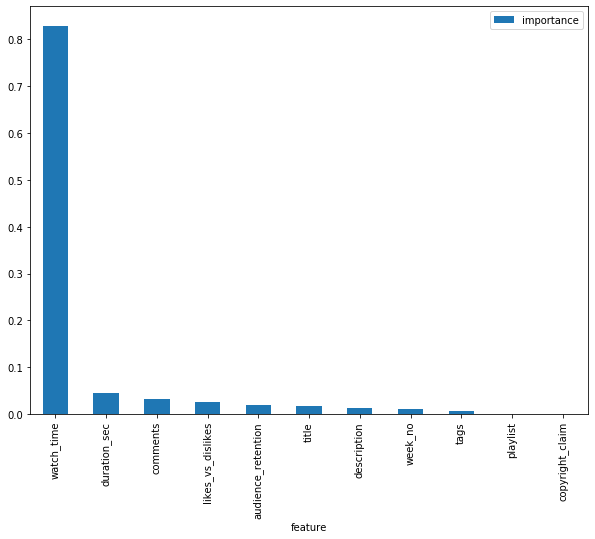

In [57]:
importances.plot.bar()

#### Training random forest:

In [58]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100, oob_score = True)
random_forest.fit(X, y)
Y_prediction = random_forest.predict(X)

random_forest.score(X, y)

acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(round(acc_random_forest,2,),"%")

95.99 %


Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest regressor, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [59]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 70.67 %


Now we can start tuning the hyperameters of random forest.

### Hyperparameter Tuning

Below you can see the code of the hyperparamter tuning for the min_samples_leaf, min_samples_split and n_estimators.

In [878]:
param_grid = {"min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12], 
              "n_estimators": [100, 200, 300, 400, 500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

reg = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

reg.fit(X, y)

reg.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

#### Test new paramters:

In [61]:
# Random Forest
random_forest = RandomForestRegressor(min_samples_leaf = 1, 
                                       min_samples_split = 2,   
                                       n_estimators=300, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X, y)
Y_prediction = random_forest.predict(X)

random_forest.score(X, y)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print('score', round(acc_random_forest,2,),"%")

oob score: 74.36 %
score 96.51 %


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(Y_prediction, y))
print('RMSE_train:', RMSE)

RMSE_train: 23033.20480271183


In [63]:
# The mean absolute percentage error is a measure of prediction accuracy of a forecasting method in statistics.

MAPE = np.mean(abs(y - Y_prediction)*100 / y)
print('MAPE_train:', MAPE)

MAPE_train: 9.571152717704116


In [64]:
dataset['predicted_views'] = Y_prediction.round()

In [65]:
dataset.head()

,title,description,tags,playlist,copyright_claim,comments,watch_time,audience_retention,likes_vs_dislikes,week_no,duration_sec,views,revenue,predicted_views
0,77.0,1502.0,443.0,2.0,1.0,147.4,788.0,0.5242,0.99300,6.2,256.74,28369.2,3.388,31132.0
1,70.2,1502.0,434.0,1.0,0.0,147.4,563.6,0.5242,0.98200,52.0,207.00,28369.2,3.388,28948.0
2,70.2,1502.0,319.0,1.0,0.0,220.0,563.6,0.6300,0.99478,52.0,156.00,28369.2,3.388,29621.0
3,70.2,1502.0,319.0,1.0,0.0,179.0,563.6,0.6000,0.99200,26.0,120.00,28369.2,3.388,28850.0
4,70.2,1502.0,319.0,1.0,0.0,177.0,563.6,0.6050,0.99200,23.0,127.00,28369.2,4.060,28860.0


## INSIGHTS

Factors that are responsible for maximum number of views are:
- **watch_time** - watch time of the video in hours
- **duration_sec** -  duration of video in seconds
- **likes_vs_dislikes** - likes vs dislikes
- **comments** - number of comments on the video
- **audience_retention** - average percentage of a YouTube video that people watch in hours

## BUSINESS SOLUTION

- Since, watch_time and audience_retention are important so I must ask my viewers to watch video till the end to increase watch_time and audience retention.<br> 
- Similarly, I must ask my viewers to like the video.
- More the comments more the engagement. Hence, I must keep my viewers engaged through the comment section.

___

- ### PREDICTING REVENUE

In [66]:
X = dataset.drop(columns=['revenue', 'predicted_views'])
y = dataset.revenue

### STANDARIZING THE DATA

Standardization is performed to prevent features with wider ranges from dominating the distance metric.

In [67]:
# importing required library for standardization
from sklearn.preprocessing import StandardScaler

# standard scaling
sc = StandardScaler()
X = sc.fit_transform(X)

- <h3> MODELS

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)

Y_prediction = random_forest.predict(X)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.41 %


In [69]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linreg = LinearRegression()
linreg.fit(X, y)

Y_pred = linreg.predict(X)

acc_lin = round(linreg.score(X, y) * 100, 2)
print(round(acc_lin,2,), "%")

87.0 %


In [70]:
from sklearn.neighbors import KNeighborsRegressor

# KNN
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X, y)

Y_pred = knn.predict(X)

acc_knn = round(knn.score(X, y) * 100, 2)
print(round(acc_knn,2,), "%")

87.65 %


In [71]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X, y)

Y_pred = decision_tree.predict(X)

acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
print(round(acc_decision_tree,2,), "%")

100.0 %


### Which is the best model ?

In [72]:
results = pd.DataFrame({'Model': ['KNN', 'Linear Regression', 'Random Forest', 'Decision Tree'],
                        'Score': [acc_knn, acc_lin, acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Decision Tree
97.41,Random Forest
87.65,KNN
87.00,Linear Regression


As we can see, the Decision Tree goes on the first place. But there are high chances of overfitting in decision tree model. Hence, we will go with Random forest regressor.

### Feature Importance

In [73]:
importances = pd.DataFrame({'feature':dataset.drop(columns=['revenue', 'predicted_views']).columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [74]:
importances

,importance
feature,
watch_time,0.728
views,0.197
duration_sec,0.024
comments,0.012
title,0.009
description,0.009
audience_retention,0.008
tags,0.004
likes_vs_dislikes,0.004


#### Training random forest:

In [75]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100, oob_score = True)
random_forest.fit(X, y)
Y_prediction = random_forest.predict(X)

random_forest.score(X, y)

acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(round(acc_random_forest,2,),"%")

97.38 %


In [76]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.78 %


Now we can start tuning the hyperameters of random forest.

### Hyperparameter Tuning

Below you can see the code of the hyperparamter tuning for the min_samples_leaf, min_samples_split and n_estimators.

In [895]:
param_grid = {"min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12], 
              "n_estimators": [100, 200, 300, 400, 500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

reg = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

reg.fit(X, y)

reg.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

#### Test new paramters:

In [77]:
# Random Forest
random_forest = RandomForestRegressor(min_samples_leaf = 1, 
                                       min_samples_split = 2,   
                                       n_estimators=300, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X, y)
Y_prediction = random_forest.predict(X)

random_forest.score(X, y)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print('score', round(acc_random_forest,2,),"%")

oob score: 82.49 %
score 97.64 %


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y, Y_prediction))
print('RMSE_train:', RMSE)

RMSE_train: 1.7571273741854072


In [79]:
# The mean absolute percentage error is a measure of prediction accuracy of a forecasting method in statistics.

MAPE = np.mean(abs(y - Y_prediction)*100 / y)
print('MAPE_train:', MAPE)

MAPE_train: 12.481916014238022


In [80]:
dataset['predicted_revenue'] = Y_prediction.round()

##### SUBMISSION

In [81]:
dataset.to_csv('submission.csv', index=False)

In [82]:
dataset.head()

,title,description,tags,playlist,copyright_claim,comments,watch_time,audience_retention,likes_vs_dislikes,week_no,duration_sec,views,revenue,predicted_views,predicted_revenue
0,77.0,1502.0,443.0,2.0,1.0,147.4,788.0,0.5242,0.99300,6.2,256.74,28369.2,3.388,31132.0,4.0
1,70.2,1502.0,434.0,1.0,0.0,147.4,563.6,0.5242,0.98200,52.0,207.00,28369.2,3.388,28948.0,3.0
2,70.2,1502.0,319.0,1.0,0.0,220.0,563.6,0.6300,0.99478,52.0,156.00,28369.2,3.388,29621.0,4.0
3,70.2,1502.0,319.0,1.0,0.0,179.0,563.6,0.6000,0.99200,26.0,120.00,28369.2,3.388,28850.0,4.0
4,70.2,1502.0,319.0,1.0,0.0,177.0,563.6,0.6050,0.99200,23.0,127.00,28369.2,4.060,28860.0,4.0


## INSIGHTS

Factors that are responsible for more revenue are:
- **watch_time** - watch time of the video in hours
- **views** - Number of views on a video
- **duration_sec** -  duration of video in seconds

## BUSINESS SOLUTION

- I must focus on the facors derived in 'predicting views' model to increase views on my channel to increase revenue.
- Since, watch_time and audience_retention are important so I must ask my viewers to watch video till the end to increase watch_time and audience retention.<br> 
- I can place more ads in longer videos and hence revenue will increase. So, I must make longer videos.

<center> <h1> END

___